In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load and clean data
sales_df = pd.read_excel("Sales.xlsx")
expenses_df = pd.read_excel("expenses.xlsx")

# Clean sales data
sales_df = sales_df.dropna(subset=["Revenue"])
sales_df.columns = ["Category", "Gross Sales", "Net Sales", "Year"]
sales_df["Year"] = sales_df["Year"].astype(int)

# Clean expenses data
expenses_df = expenses_df.dropna(subset=["Department Name:"])
expenses_df.columns = ["Department", "Total Expense", "Year"]
expenses_df["Year"] = expenses_df["Year"].astype(int)

In [22]:
sales_df.head()

,Category,Gross Sales,Net Sales,Year
0,ACCOM,27512145.60,21493863.75,2022
1,AIRPORT TRANSFERS,305800.00,259152.54,2022
2,BEVE,7974618.85,6457181.25,2022
3,CONFERENCE,5354849.71,4183476.33,2022
4,EXCURSION,139400.00,118135.59,2022


In [23]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 58
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     53 non-null     object 
 1   Gross Sales  53 non-null     float64
 2   Net Sales    53 non-null     float64
 3   Year         53 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 1.9+ KB


In [24]:
expenses_df.head()

,Department,Total Expense,Year
0,ADMIN & GENERAL OFFICE,649148.00,2022
1,CONFERENCE,285679.85,2022
3,DISPENSE BAR,1227273.10,2022
5,DUMA BAR,1542208.52,2022
7,EKWENA RESTAURANT,459255.16,2022


In [25]:
expenses_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 91
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Department     43 non-null     object 
 1   Total Expense  43 non-null     float64
 2   Year           43 non-null     int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 1.2+ KB


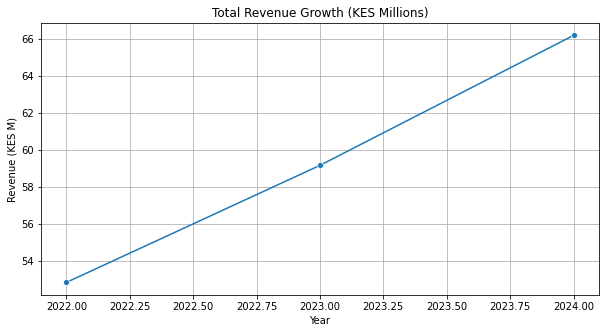

In [26]:
# Visualization: Revenue Trend
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_df.groupby("Year")["Net Sales"].sum()/1e6, marker='o')
plt.title("Total Revenue Growth (KES Millions)")
plt.xlabel("Year")
plt.ylabel("Revenue (KES M)")
plt.grid(True)
plt.show()

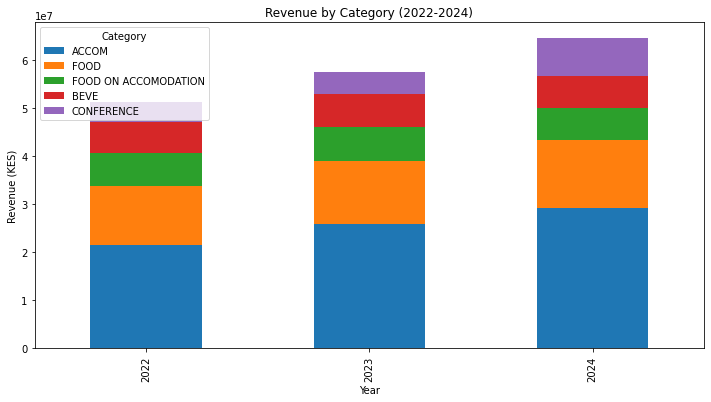

In [27]:
# Visualization: Revenue by Category
top_categories = sales_pivot.mean().sort_values(ascending=False).head(5).index
sales_pivot[top_categories].plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Revenue by Category (2022-2024)")
plt.ylabel("Revenue (KES)")
plt.show()

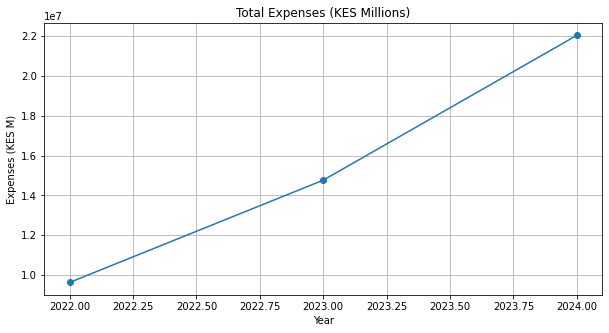

In [28]:
# Visualization: Expense Growth
plt.figure(figsize=(10,5))
expenses_df.groupby("Year")["Total Expense"].sum().plot(kind='line', marker='o')
plt.title("Total Expenses (KES Millions)")
plt.xlabel("Year")
plt.ylabel("Expenses (KES M)")
plt.grid(True)
plt.show()

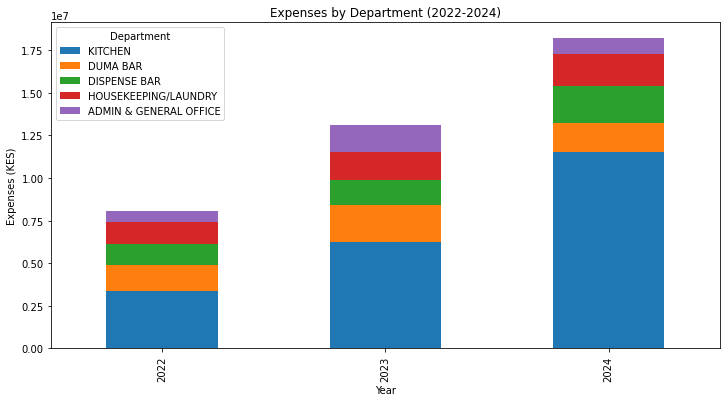

In [29]:
# Visualization: Expenses by Department
top_depts = expenses_pivot.mean().sort_values(ascending=False).head(5).index
expenses_pivot[top_depts].plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Expenses by Department (2022-2024)")
plt.ylabel("Expenses (KES)")
plt.show()

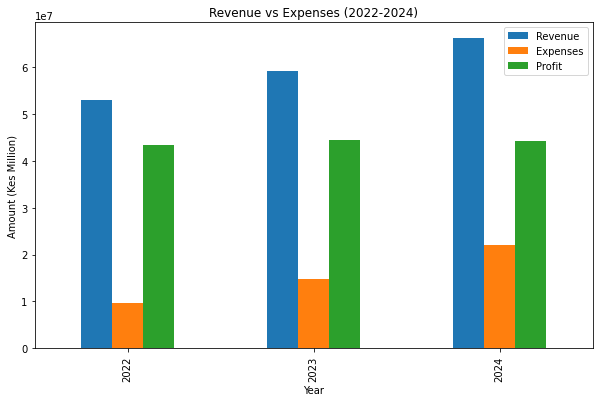

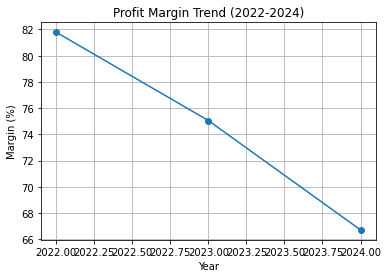

In [30]:
# Calculate profit and margin
summary_df = pd.DataFrame({
    "Revenue": total_revenue,
    "Expenses": total_expenses
})
summary_df["Profit"] = summary_df["Revenue"] - summary_df["Expenses"]
summary_df["Margin"] = summary_df["Profit"] / summary_df["Revenue"] * 100

summary_df[["Revenue", "Expenses", "Profit"]].plot(kind='bar', figsize=(10,6))
plt.title("Revenue vs Expenses (2022-2024)")
plt.ylabel("Amount (Kes Million)")
plt.show()

summary_df["Margin"].plot(kind='line', marker='o')
plt.title("Profit Margin Trend (2022-2024)")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

In [31]:
# Linear regression for 2025 revenue
X = np.array([2022, 2023, 2024]).reshape(-1, 1)
y = sales_df.groupby("Year")["Net Sales"].sum().values
model = LinearRegression().fit(X, y)
revenue_2025 = model.predict([[2025]])[0]
print(f"Projected 2025 Revenue: KES {revenue_2025/1e6:.1f}M")

Projected 2025 Revenue: KES 72.7M


In [32]:
# Linear regression for 2025 expenses
X = np.array([2022, 2023, 2024]).reshape(-1, 1)
y = expenses_df.groupby("Year")["Total Expense"].sum().values
model = LinearRegression().fit(X, y)
expenses_2025 = model.predict([[2025]])[0]
print(f"Projected 2025 Expenses: KES {expenses_2025/1e6:.1f}M")

Projected 2025 Expenses: KES 27.9M


In [33]:
# Calculate historical revenue and expenses
historical_revenue = sales_df.groupby("Year")["Net Sales"].sum() / 1e6  # Convert to KES millions
historical_expenses = expenses_df.groupby("Year")["Total Expense"].sum() / 1e6

# Linear regression for 2025 projections
years = np.array([2022, 2023, 2024]).reshape(-1, 1)

# Revenue projection
revenue_model = LinearRegression().fit(years, historical_revenue.values)
revenue_2025 = revenue_model.predict([[2025]])[0]

# Expense projection
expense_model = LinearRegression().fit(years, historical_expenses.values)
expense_2025 = expense_model.predict([[2025]])[0]

# Create profitability table
profitability_outlook = pd.DataFrame({
    "Year": [2022, 2023, 2024, 2025],
    "Revenue (KES M)": [
        historical_revenue[2022],
        historical_revenue[2023],
        historical_revenue[2024],
        revenue_2025
    ],
    "Expenses (KES M)": [
        historical_expenses[2022],
        historical_expenses[2023],
        historical_expenses[2024],
        expense_2025
    ]
})

# Calculate profit and margin
profitability_outlook["Profit (KES M)"] = (
    profitability_outlook["Revenue (KES M)"] - profitability_outlook["Expenses (KES M)"]
)
profitability_outlook["Margin (%)"] = (
    profitability_outlook["Profit (KES M)"] / profitability_outlook["Revenue (KES M)"] * 100
).round(1)

# Export to CSV
# profitability_outlook.to_csv("hunters_paradise_profitability_outlook_2022-2025.csv", index=False)

# Display the table
print("Profitability Outlook (2022-2025)")
print(profitability_outlook.to_string(index=False))

Profitability Outlook (2022-2025)
 Year  Revenue (KES M)  Expenses (KES M)  Profit (KES M)  Margin (%)
 2022        52.857512          9.627001       43.230511        81.8
 2023        59.168167         14.761977       44.406190        75.1
 2024        66.174769         22.033516       44.141253        66.7
 2025        72.717406         27.880679       44.836727        61.7


<ipython-input-35-2e6fd0c13531>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


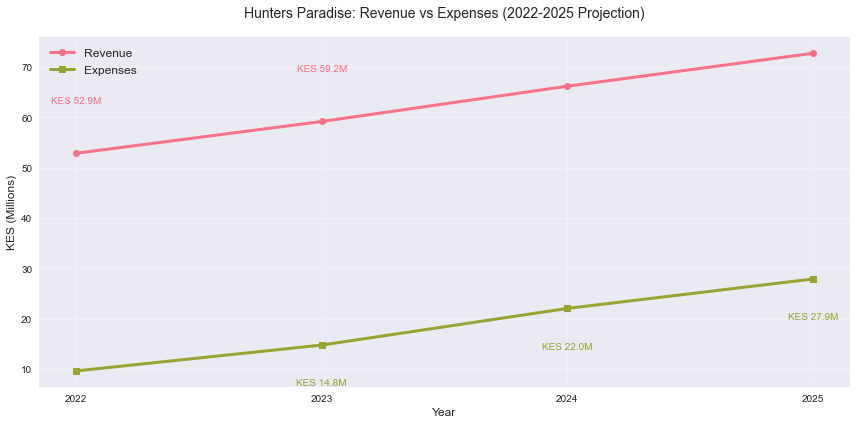

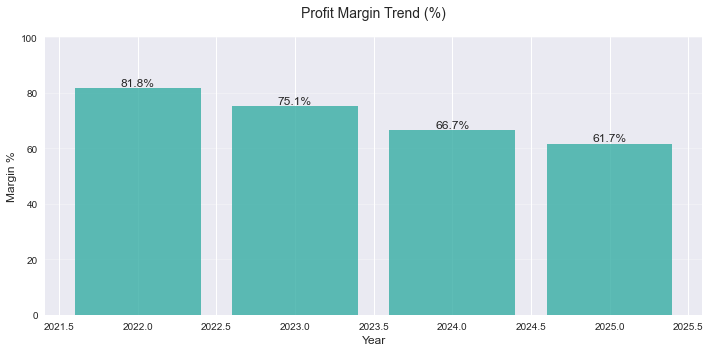

<Figure size 720x432 with 0 Axes>

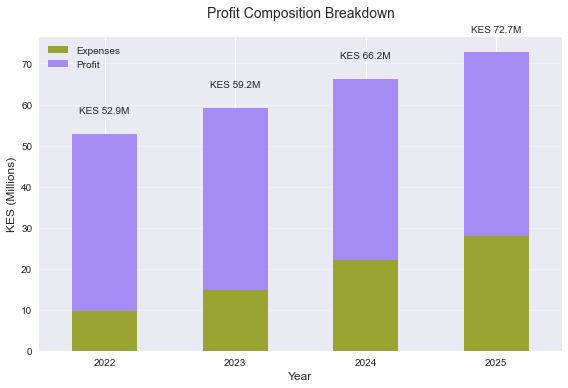

In [35]:
# Create DataFrame
profitability = pd.DataFrame({
    "Year": [2022, 2023, 2024, 2025],
    "Revenue (KES M)": [*historical_revenue.values, revenue_2025],
    "Expenses (KES M)": [*historical_expenses.values, expense_2025]
})
profitability["Profit (KES M)"] = profitability["Revenue (KES M)"] - profitability["Expenses (KES M)"]
profitability["Margin (%)"] = (profitability["Profit (KES M)"] / profitability["Revenue (KES M)"] * 100).round(1)

# ======================
# VISUALIZATIONS
# ======================

plt.style.use('seaborn')
colors = sns.color_palette("husl", 4)

# 1. Revenue vs Expenses Trend
plt.figure(figsize=(12, 6))
plt.plot(profitability["Year"], profitability["Revenue (KES M)"], 
         marker='o', label="Revenue", linewidth=3, color=colors[0])
plt.plot(profitability["Year"], profitability["Expenses (KES M)"], 
         marker='s', label="Expenses", linewidth=3, color=colors[1])

plt.title("Hunters Paradise: Revenue vs Expenses (2022-2025 Projection)", fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KES (Millions)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(profitability["Year"])
plt.tight_layout()

# Add value annotations
for i, row in profitability.iterrows():
    plt.annotate(f"KES {row['Revenue (KES M)']:.1f}M", 
                 (row["Year"], row["Revenue (KES M)"] + 10), 
                 ha='center', color=colors[0])
    plt.annotate(f"KES {row['Expenses (KES M)']:.1f}M", 
                 (row["Year"], row["Expenses (KES M)"] - 8), 
                 ha='center', color=colors[1])

plt.show()

# 2. Profit Margin Trend
plt.figure(figsize=(10, 5))
bars = plt.bar(profitability["Year"], profitability["Margin (%)"], 
               color=colors[2], alpha=0.8)

plt.title("Profit Margin Trend (%)", fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Margin %", fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.ylim(0, 100)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f"{height}%", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# 3. Profit Composition Stacked Bar
plt.figure(figsize=(10, 6))
profitability.set_index("Year")[["Expenses (KES M)", "Profit (KES M)"]].plot(
    kind='bar', stacked=True, color=[colors[1], colors[3]])

plt.title("Profit Composition Breakdown", fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KES (Millions)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y', alpha=0.3)

# Add total labels
totals = profitability["Revenue (KES M)"]
for i, total in enumerate(totals):
    plt.text(i, total + 5, f"KES {total:.1f}M", 
             ha='center', fontsize=10)

plt.legend(["Expenses", "Profit"], loc='upper left')
plt.tight_layout()
plt.show()